In [12]:
import ffmpeg
print(ffmpeg)

<module 'ffmpeg' from 'C:\\Users\\Radcoflex-Purchase\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\ffmpeg\\__init__.py'>


In [13]:
#help(ffmpeg)
print(dir(ffmpeg))

['Error', 'Stream', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ffmpeg', '_filters', '_probe', '_run', '_utils', '_view', 'colorchannelmixer', 'compile', 'concat', 'crop', 'dag', 'drawbox', 'drawtext', 'filter', 'filter_', 'filter_multi_output', 'get_args', 'hflip', 'hue', 'input', 'merge_outputs', 'nodes', 'output', 'overlay', 'overwrite_output', 'probe', 'run', 'run_async', 'setpts', 'trim', 'unicode_literals', 'vflip', 'view', 'zoompan']


In [14]:
probe = ffmpeg.probe("C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/deadpool.mp4")
video_info = None
for stream in probe['streams']:
            if stream['codec_type'] == 'video':
                video_info = stream
                break
        
if video_info is None:
    raise ValueError("No video stream found in the input file.")
        

frame_count = int(video_info['nb_frames'])
frame_rate = eval(video_info['r_frame_rate'])  
width = int(video_info['width'])
height = int(video_info['height'])
duration = float(video_info['duration'])
pix_fmt = video_info.get('pix_fmt', 'unknown')
codec_name = video_info.get('codec_name', 'unknown')
bit_rate = video_info.get('bit_rate', 'unknown')
avg_frame_rate = eval(video_info.get('avg_frame_rate', '0/1'))
time_base = video_info.get('time_base', 'unknown')
color_space = video_info.get('color_space', 'unknown')
color_range = video_info.get('color_range', 'unknown')
profile = video_info.get('profile', 'unknown')
codec_tag_string = video_info.get('codec_tag_string', 'unknown')
level = video_info.get('level', 'unknown')




        
print(f"Frame Count: {frame_count}")
print(f"Frame Rate: {frame_rate} fps")
print(f"Resolution: {width}x{height}")
print(f"Duration: {duration} seconds")
print(f"Width: {width}")
print(f"Height: {height}")
print(f"Pixel Format: {pix_fmt}")
print(f"Codec Name: {codec_name}")
print(f"Bit Rate: {bit_rate}")
print(f"Average Frame Rate: {avg_frame_rate}")
print(f"Time Base: {time_base}")
print(f"Color Space: {color_space}")
print(f"Color Range: {color_range}")
print(f"Profile: {profile}")
print(f"Codec Tag: {codec_tag_string}")
print(f"Level: {level}")


Frame Count: 1070
Frame Rate: 60.0 fps
Resolution: 720x1280
Duration: 17.833333 seconds
Width: 720
Height: 1280
Pixel Format: yuv420p
Codec Name: h264
Bit Rate: 2349393
Average Frame Rate: 60.0
Time Base: 1/15360
Color Space: bt709
Color Range: tv
Profile: Main
Codec Tag: avc1
Level: 32


I-Frames: 19 (1.78%)
P-Frames: 439 (41.03%)
B-Frames: 612 (57.20%)


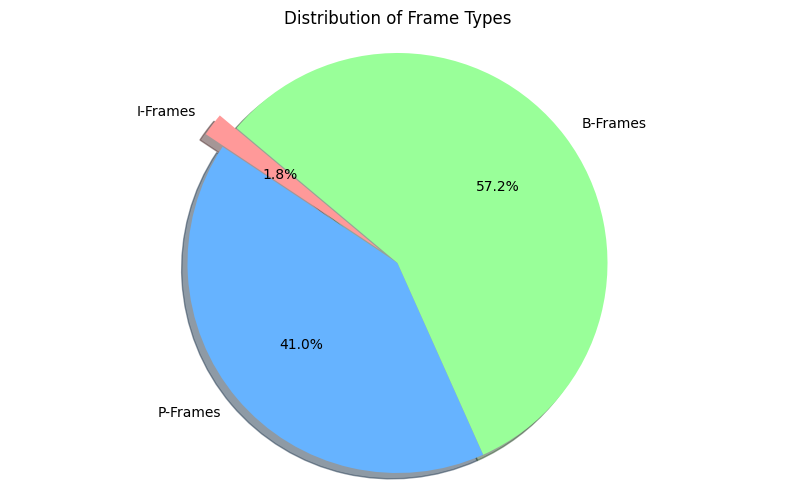

No of I frames in the video: 19
No of P frames in the video: 439
No of B frames in the video: 612


In [18]:
import ffmpeg
import matplotlib.pyplot as plt

input_file = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/deadpool.mp4'

try:
    probe = ffmpeg.probe(input_file, select_streams='v', show_frames=None, show_entries='frame=pict_type')

    frames = probe['frames']
    frame_count = len(frames)

    i_frames = 0
    p_frames = 0
    b_frames = 0

    for frame in frames:
        if frame['pict_type'] == 'I':
            i_frames += 1
        elif frame['pict_type'] == 'P':
            p_frames += 1
        elif frame['pict_type'] == 'B':
            b_frames += 1

    i_frame_percentage = (i_frames / frame_count) * 100
    p_frame_percentage = (p_frames / frame_count) * 100
    b_frame_percentage = (b_frames / frame_count) * 100

    print(f"I-Frames: {i_frames} ({i_frame_percentage:.2f}%)")
    print(f"P-Frames: {p_frames} ({p_frame_percentage:.2f}%)")
    print(f"B-Frames: {b_frames} ({b_frame_percentage:.2f}%)")

    labels = ['I-Frames', 'P-Frames', 'B-Frames']
    sizes = [i_frame_percentage, p_frame_percentage, b_frame_percentage]
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    explode = (0.1, 0, 0)  

    plt.figure(figsize=(10, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')  
    plt.title('Distribution of Frame Types')
    plt.show()

except ffmpeg.Error as e:
    print(f"An error occurred: {e.stderr.decode()}")
    
print(f"No of I frames in the video: {i_frames}")
print(f"No of P frames in the video: {p_frames}")
print(f"No of B frames in the video: {b_frames}")


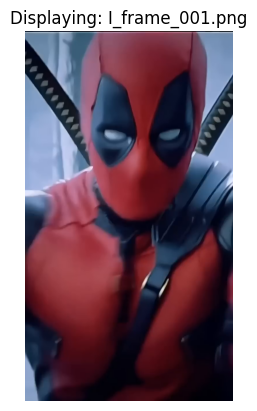

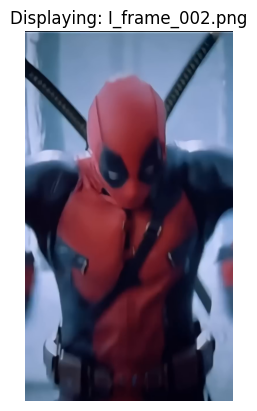

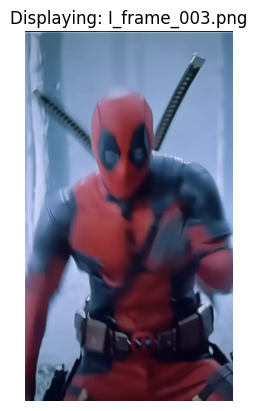

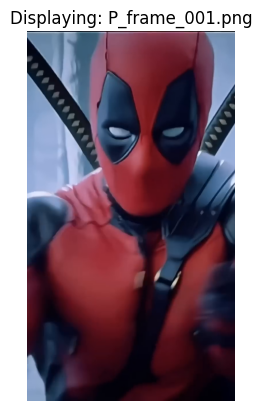

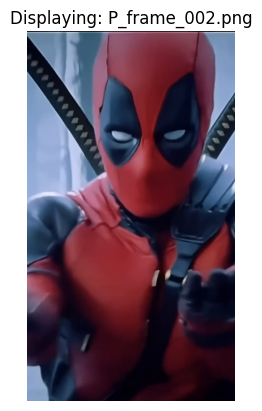

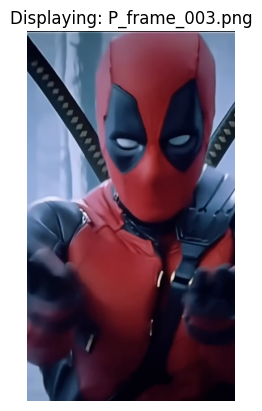

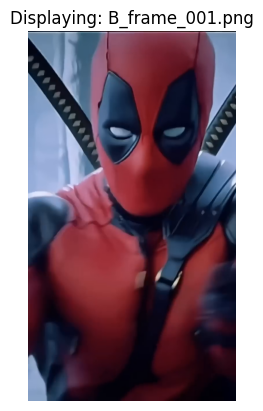

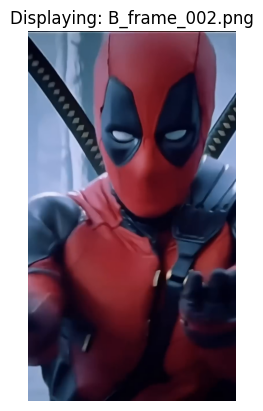

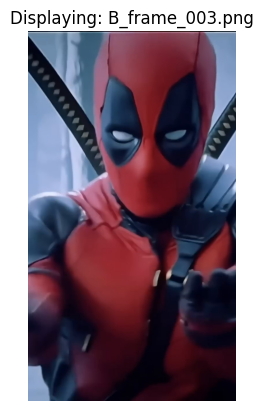

In [18]:
import glob
from PIL import Image

# Extract I-Frames
ffmpeg.input(input_file).output('I_frame_%03d.png', vf='select=eq(pict_type\\,I)', vsync='vfr').run()

# Extract P-Frames
ffmpeg.input(input_file).output('P_frame_%03d.png', vf='select=eq(pict_type\\,P)', vsync='vfr').run()

# Extract B-Frames
ffmpeg.input(input_file).output('B_frame_%03d.png', vf='select=eq(pict_type\\,B)', vsync='vfr').run()

# Display I-Frames
i_frames = sorted(glob.glob("I_frame_*.png"))
for frame_path in i_frames[:3]:  # Display the first 3 I-frames
    img = Image.open(frame_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f"Displaying: {frame_path}")
    plt.axis('off')
    plt.show()

# Display P-Frames
p_frames = sorted(glob.glob("P_frame_*.png"))
for frame_path in p_frames[:3]:  # Display the first 3 P-frames
    img = Image.open(frame_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f"Displaying: {frame_path}")
    plt.axis('off')
    plt.show()

# Display B-Frames
b_frames = sorted(glob.glob("B_frame_*.png"))
for frame_path in b_frames[:3]:  # Display the first 3 B-frames
    img = Image.open(frame_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f"Displaying: {frame_path}")
    plt.axis('off')
    plt.show()


In [26]:
import ffmpeg
import os

input_file = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/deadpool.mp4'

output_directory = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/images/'

os.makedirs(output_directory, exist_ok=True)

i_frame_pattern = os.path.join(output_directory, 'I_frame_%03d.png')
p_frame_pattern = os.path.join(output_directory, 'P_frame_%03d.png')
b_frame_pattern = os.path.join(output_directory, 'B_frame_%03d.png')

ffmpeg.input(input_file).output(i_frame_pattern, vf="select=eq(pict_type\\,I)", vsync='vfr').run()
print("I frames extracted and saved as images.")

ffmpeg.input(input_file).output(p_frame_pattern, vf="select=eq(pict_type\\,P)", vsync='vfr').run()
print("P frames extracted and saved as images.")

ffmpeg.input(input_file).output(b_frame_pattern, vf="select=eq(pict_type\\,B)", vsync='vfr').run()
print("B frames extracted and saved as images.")


I frames extracted and saved as images.
P frames extracted and saved as images.
B frames extracted and saved as images.


In [22]:
import cv2
import os
import glob

output_directory = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/images/'
i_frame_pattern = os.path.join(output_directory, 'I_frame_*.png')
p_frame_pattern = os.path.join(output_directory, 'P_frame_*.png')
b_frame_pattern = os.path.join(output_directory, 'B_frame_*.png')


def display_images(pattern):
    for image_file in glob.glob(pattern):
        img = cv2.imread(image_file)
        if img is not None:
            cv2.imshow(f"Frame: {image_file}", img)
            cv2.waitKey(0) 
            
            
            
            
            
            
            
            
            cv2.destroyAllWindows()


print("Displaying I frames...")
display_images(i_frame_pattern)

print("Displaying P frames...")
display_images(p_frame_pattern)

print("Displaying B frames...")
display_images(b_frame_pattern)


Displaying I frames...
Displaying P frames...


KeyboardInterrupt: 

In [8]:
"""import os

def calculate_frame_sizes(frame_pattern):
    frame_files = sorted(glob.glob(frame_pattern))
    
    sizes = [os.path.getsize(f) for f in frame_files]
    return sizes


i_frame_sizes = calculate_frame_sizes("I_frame_*.png")
p_frame_sizes = calculate_frame_sizes("P_frame_*.png")
b_frame_sizes = calculate_frame_sizes("B_frame_*.png")


def average_size(sizes):
    return sum(sizes) / len(sizes) if sizes else 0

i_frame_avg_size = average_size(i_frame_sizes)
p_frame_avg_size = average_size(p_frame_sizes)
b_frame_avg_size = average_size(b_frame_sizes)

print(f"Average I-Frame Size: {i_frame_avg_size:.2f} bytes")
print(f"Average P-Frame Size: {p_frame_avg_size:.2f} bytes")
print(f"Average B-Frame Size: {b_frame_avg_size:.2f} bytes")
"""

Average I-Frame Size: 542233.63 bytes
Average P-Frame Size: 652280.49 bytes
Average B-Frame Size: 660047.97 bytes


In [37]:
import os
import glob

def calculate_frame_sizes(frame_pattern):
    frame_files = sorted(glob.glob(frame_pattern))
    sizes = [os.path.getsize(f) for f in frame_files]
    return sizes

def average_size(sizes):
    return sum(sizes) / len(sizes) if sizes else 0

i_frame_sizes = calculate_frame_sizes("I_frame_*.png")
p_frame_sizes = calculate_frame_sizes("P_frame_*.png")
b_frame_sizes = calculate_frame_sizes("B_frame_*.png")

i_frame_avg_size = average_size(i_frame_sizes)
p_frame_avg_size = average_size(p_frame_sizes)
b_frame_avg_size = average_size(b_frame_sizes)

print(f"Average I-Frame Size: {i_frame_avg_size:.2f} bytes")
print(f"Average P-Frame Size: {p_frame_avg_size:.2f} bytes")
print(f"Average B-Frame Size: {b_frame_avg_size:.2f} bytes")

print(i_frame_sizes)
print(p_frame_sizes)
print(b_frame_sizes)


Average I-Frame Size: 822233.63 bytes
Average P-Frame Size: 652280.49 bytes
Average B-Frame Size: 660047.97 bytes
[634193, 607964, 685818, 578302, 664500, 667297, 533595, 660154, 590721, 400250, 369249, 477853, 527532, 469646, 414245, 378148, 594625, 477265, 571082]
[681653, 711009, 720121, 777503, 810499, 833901, 794122, 719560, 714604, 698813, 716590, 717582, 749785, 760979, 797033, 791812, 801658, 803849, 773671, 732628, 734101, 603865, 655814, 727438, 703896, 680745, 680038, 647797, 709719, 758670, 790424, 802761, 782834, 744993, 759642, 812299, 845628, 884511, 902766, 910236, 883561, 794160, 794492, 749200, 686790, 673896, 625535, 628922, 667219, 713053, 753810, 796471, 831789, 857683, 865313, 842091, 772719, 745633, 656118, 647189, 618382, 595382, 597741, 579155, 599393, 603980, 652156, 695477, 726611, 748428, 759823, 754285, 737063, 716356, 698830, 687767, 672241, 704537, 590366, 631088, 632453, 690011, 751396, 718066, 659178, 666928, 658191, 663019, 677620, 685985, 667642, 7032

In [21]:
import ffmpeg
import os


input_video_path = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/deadpool.mp4'

i_frame_dir = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/i_frames'

os.makedirs(i_frame_dir, exist_ok=True)

ffmpeg.input(input_video_path).output(f'{i_frame_dir}/frame_%04d.jpg', vf='select=eq(pict_type\\,I)').run()

(None, None)

In [24]:
import cv2
import os

i_frame_dir = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/i_frames'

output_video_path = 'C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/result.mp4'

frame_rate = 25

frame_files = sorted([f for f in os.listdir(i_frame_dir) if f.endswith('.jpg')])

first_frame = cv2.imread(os.path.join(i_frame_dir, frame_files[0]))
height, width, layers = first_frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
video_writer = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

for frame_file in frame_files:
    frame = cv2.imread(os.path.join(i_frame_dir, frame_file))
    video_writer.write(frame)

video_writer.release()

print(f'Reconstructed video saved as {output_video_path}')


Reconstructed video saved as C:/Users/Radcoflex-Purchase/Desktop/COLLEGE/SEM 7/Image and Video Analytics/Lab 2/result.mp4
